<a href="https://www.kaggle.com/code/voidelin/exploratory-data-analysis-of-la-crime-data?scriptVersionId=152616217" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv('/kaggle/input/crime-data-from-2020-to-present/Crime_Data_from_2020_to_Present.csv')

In [2]:
# Display general information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843514 entries, 0 to 843513
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           843514 non-null  int64  
 1   Date Rptd       843514 non-null  object 
 2   DATE OCC        843514 non-null  object 
 3   TIME OCC        843514 non-null  int64  
 4   AREA            843514 non-null  int64  
 5   AREA NAME       843514 non-null  object 
 6   Rpt Dist No     843514 non-null  int64  
 7   Part 1-2        843514 non-null  int64  
 8   Crm Cd          843514 non-null  int64  
 9   Crm Cd Desc     843514 non-null  object 
 10  Mocodes         726560 non-null  object 
 11  Vict Age        843514 non-null  int64  
 12  Vict Sex        732198 non-null  object 
 13  Vict Descent    732190 non-null  object 
 14  Premis Cd       843504 non-null  float64
 15  Premis Desc     843004 non-null  object 
 16  Weapon Used Cd  293900 non-null  float64
 17  Weapon Des

In [3]:
pd.set_option("display.max.columns", None)
# Displays the first 5 rows of the dataset
print(df.head())

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc         Mocodes  \
0                           BATTERY - SIMPLE ASSAULT       0444 0913   
1                           BATTERY - SIMPLE ASSAULT  0416 1822 1414   
2       

In [4]:
print(df.describe())

              DR_NO       TIME OCC           AREA    Rpt Dist No  \
count  8.435140e+05  843514.000000  843514.000000  843514.000000   
mean   2.165359e+08    1336.124087      10.707493    1117.181555   
std    1.095558e+07     653.818714       6.096013     609.593376   
min    8.170000e+02       1.000000       1.000000     101.000000   
25%    2.102142e+08     900.000000       6.000000     615.000000   
50%    2.202101e+08    1415.000000      11.000000    1141.000000   
75%    2.221141e+08    1900.000000      16.000000    1617.000000   
max    2.399306e+08    2359.000000      21.000000    2199.000000   

            Part 1-2         Crm Cd       Vict Age      Premis Cd  \
count  843514.000000  843514.000000  843514.000000  843504.000000   
mean        1.413064     500.783242      29.764563     305.893514   
std         0.492384     207.740379      21.791412     216.874954   
min         1.000000     110.000000      -3.000000     101.000000   
25%         1.000000     331.000000       

In [5]:
# Check for missing values
print(df.isnull().sum())

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           116954
Vict Age               0
Vict Sex          111316
Vict Descent      111324
Premis Cd             10
Premis Desc          510
Weapon Used Cd    549614
Weapon Desc       549614
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          781593
Crm Cd 3          841421
Crm Cd 4          843453
LOCATION               0
Cross Street      709048
LAT                    0
LON                    0
dtype: int64


In [6]:
# Check for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [7]:
# Drop Mocodes column
df = df.drop(columns='Mocodes', errors='ignore')

/tmp/ipykernel_19/4130569524.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


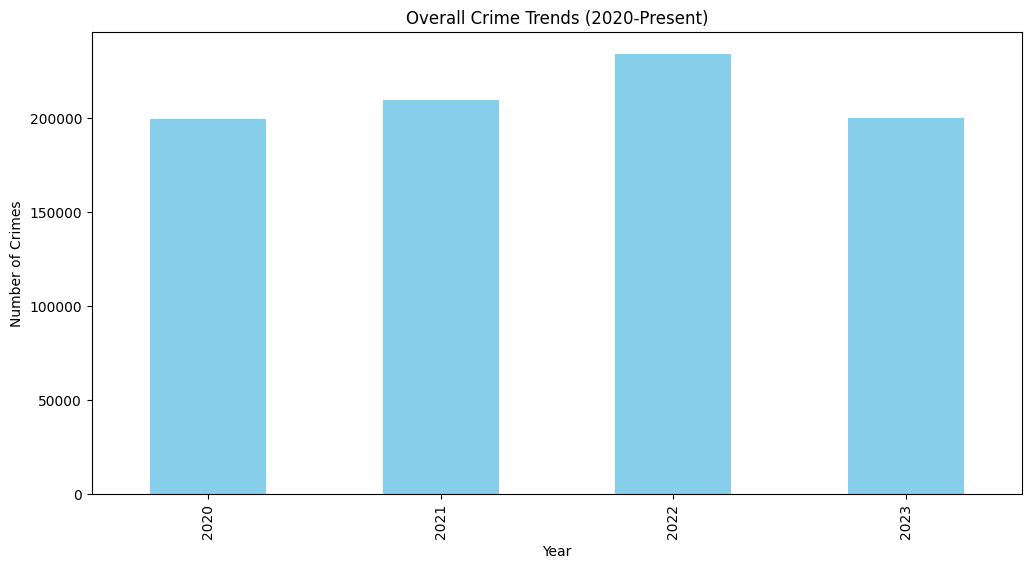

In [8]:
# Extract and convert the date occurance column to datetime format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


# Create a new column for the year
df['DATE OCC YEAR'] = df['DATE OCC'].dt.year

# Plot the overall crime trends
plt.figure(figsize=(12, 6))
df.groupby('DATE OCC YEAR').size().plot(kind='bar', color='skyblue')
plt.title('Overall Crime Trends (2020-Present)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

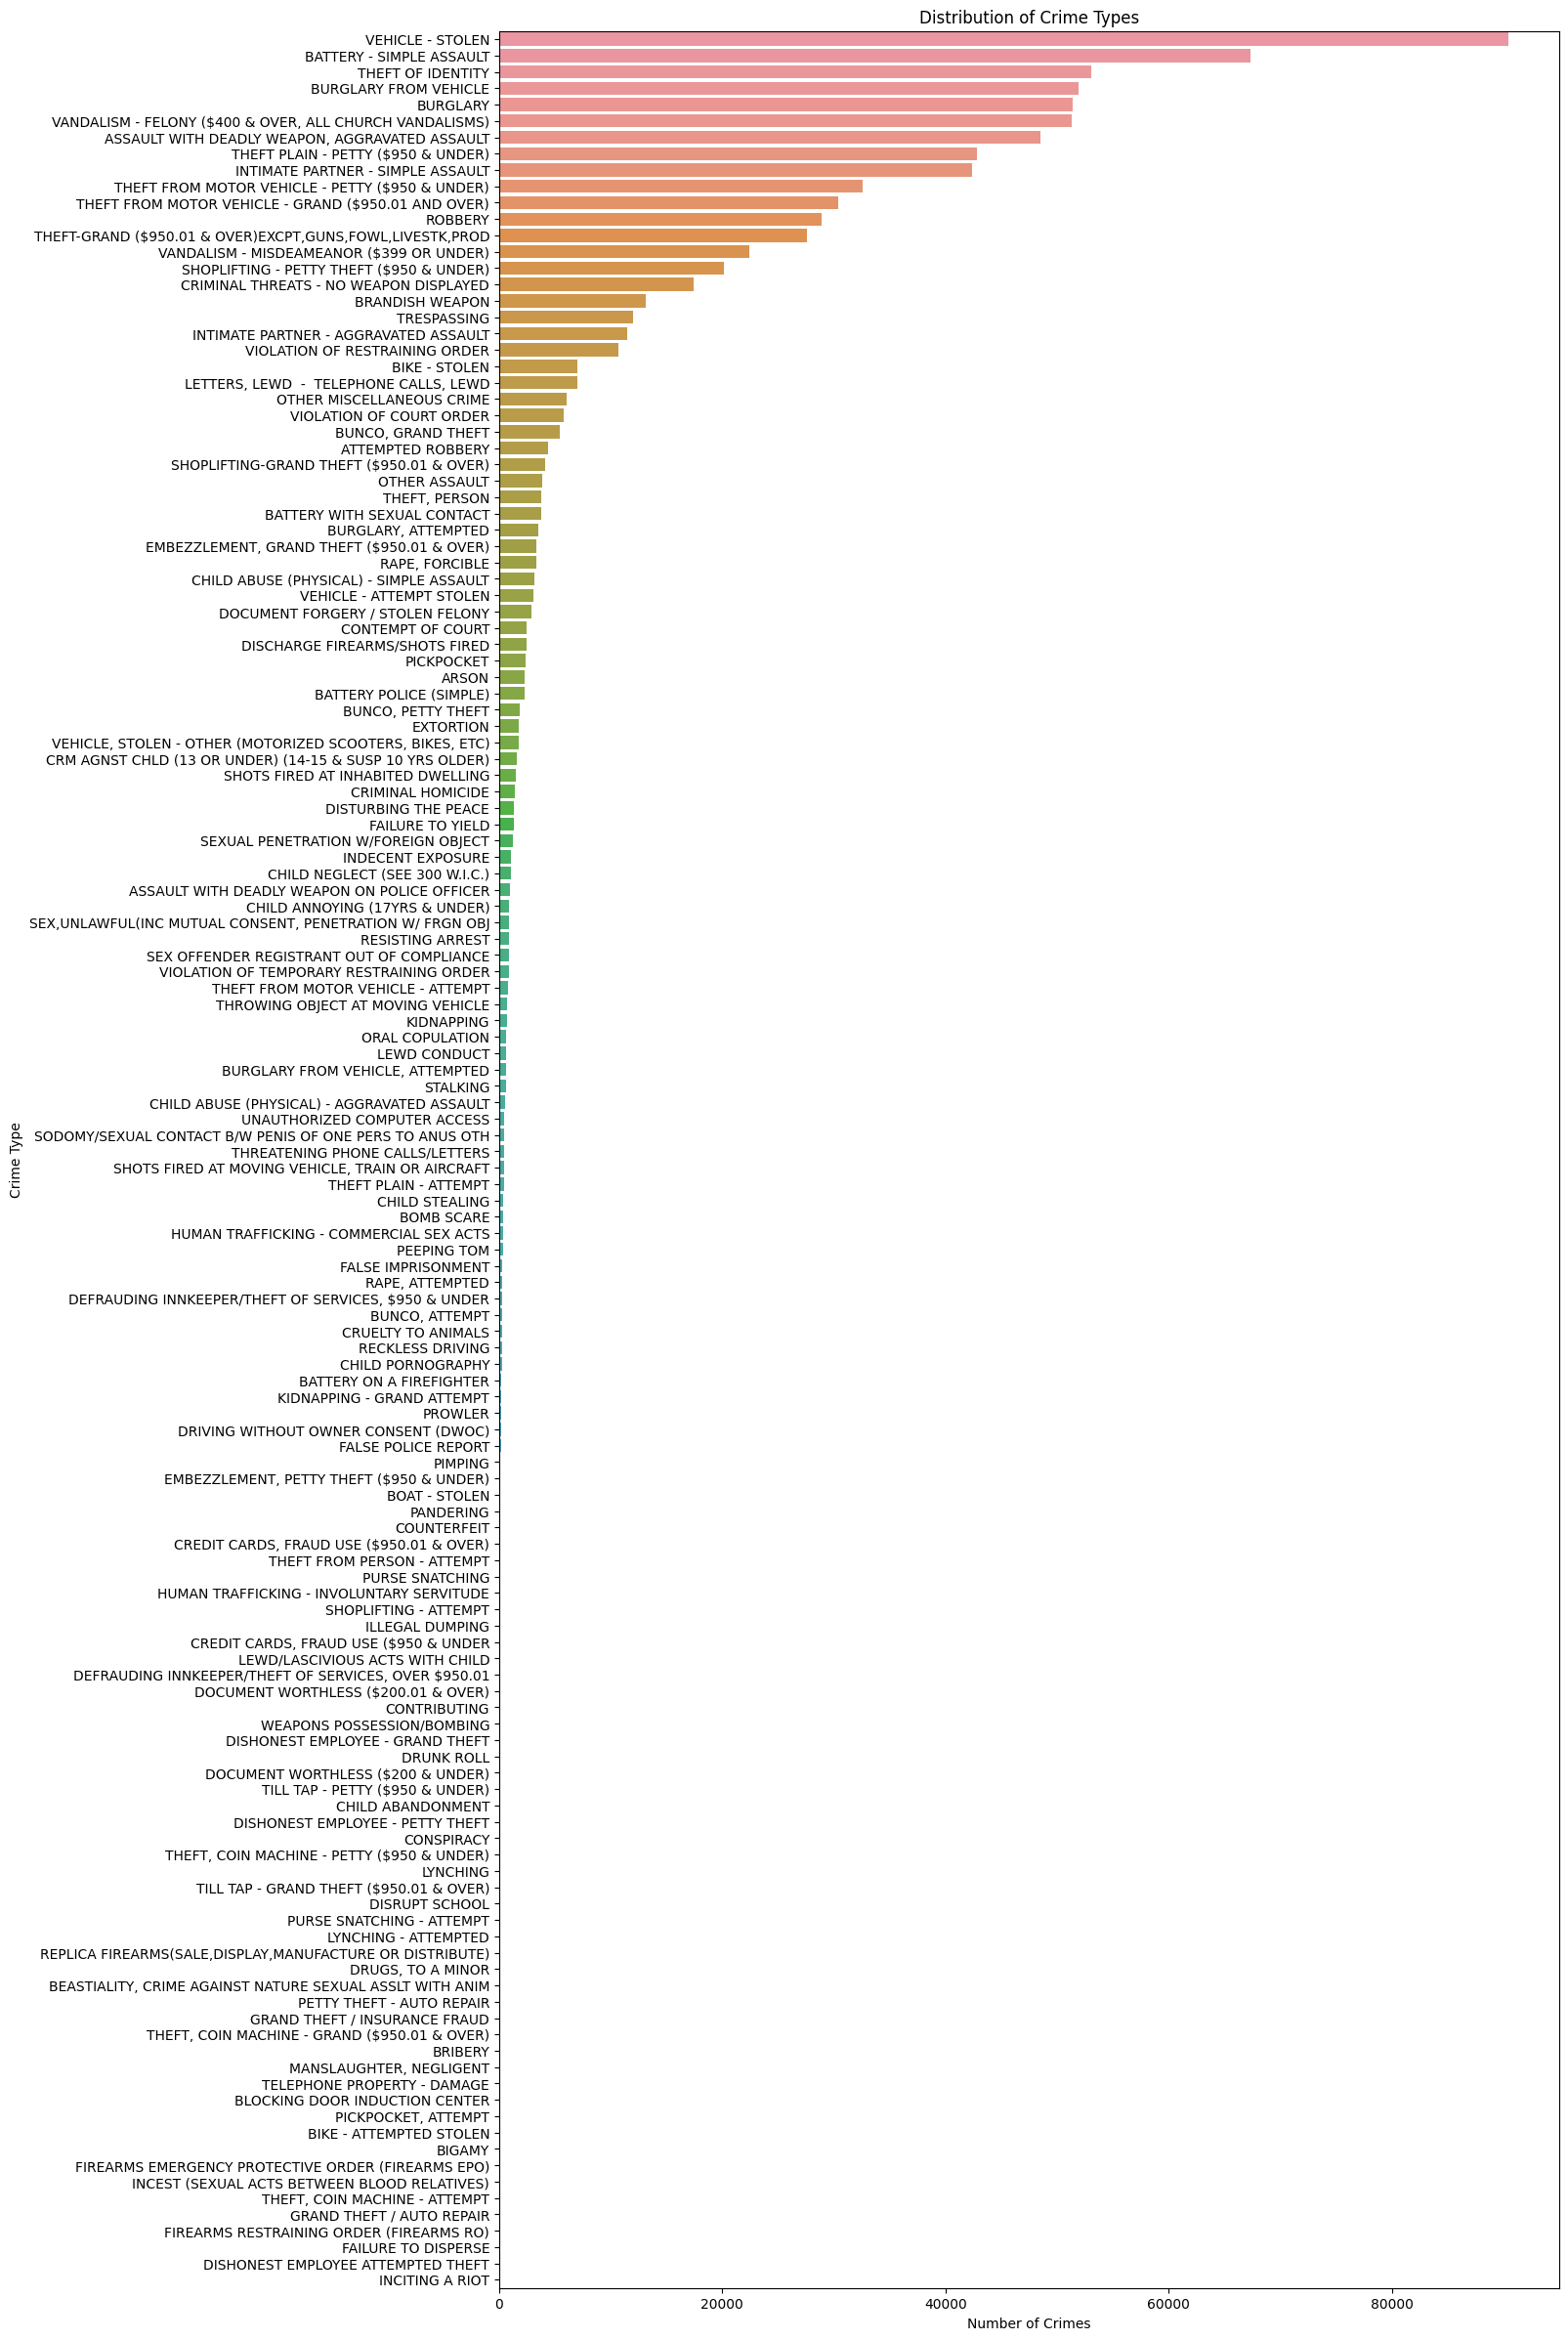

In [9]:
# Plot the distribution of crime types
plt.figure(figsize=(14, 30))
sns.countplot(y='Crm Cd Desc', data=df, order=df['Crm Cd Desc'].value_counts().index)
plt.title('Distribution of Crime Types')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()

In [10]:
# Create new columns for month, day, and hour
df['DATE OCC MONTH'] = df['DATE OCC'].dt.month
df['DATE OCC DAY'] = df['DATE OCC'].dt.day_name()

# Extract and convert the time occurance column to datetime format
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H%M', errors='coerce')
df['TIME OCC HOUR'] = df['TIME OCC'].dt.hour


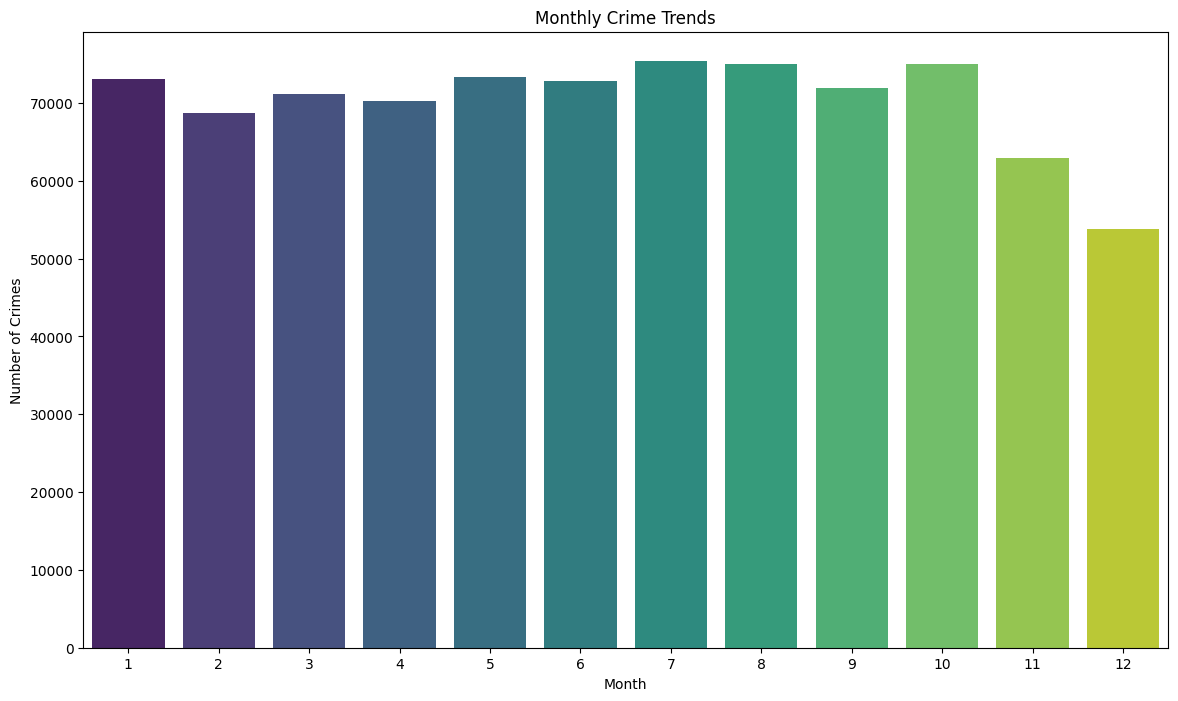

In [11]:
# Plot monthly crime trends
plt.figure(figsize=(14, 8))
sns.countplot(x='DATE OCC MONTH', data=df, palette='viridis')
plt.title('Monthly Crime Trends')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

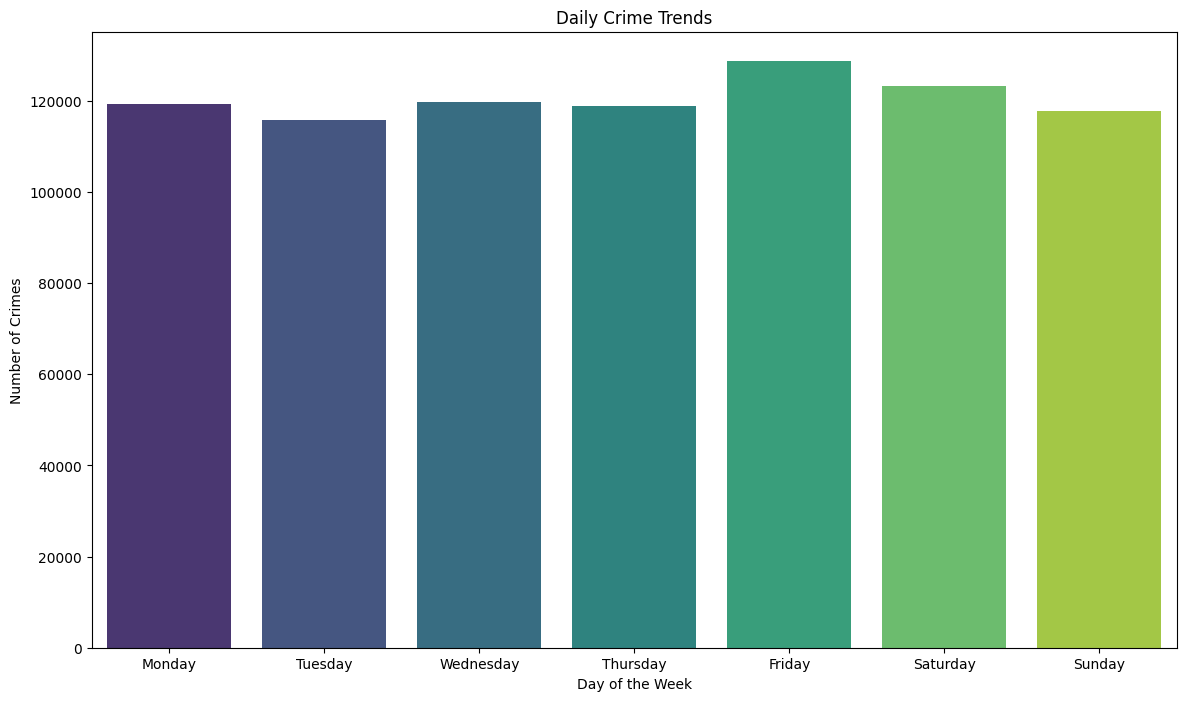

In [12]:
# Plot daily crime trends
plt.figure(figsize=(14, 8))
sns.countplot(x='DATE OCC DAY', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Daily Crime Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

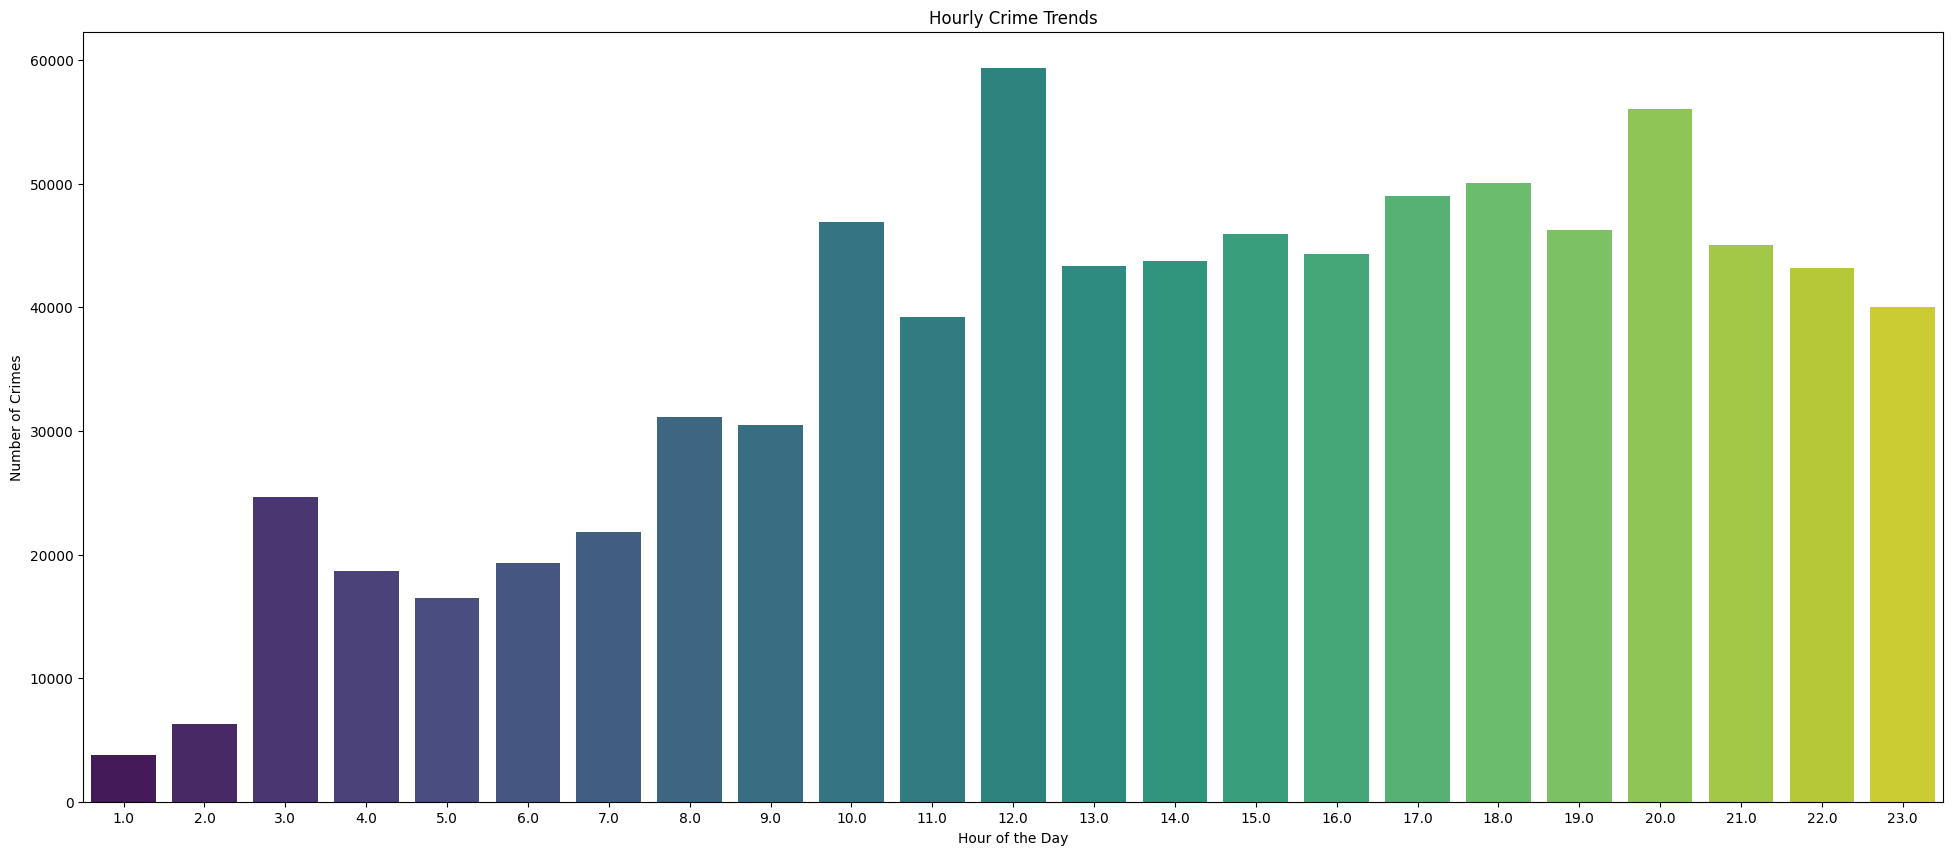

In [13]:
# Plot hourly crime trends
plt.figure(figsize=(24, 10))
sns.countplot(x='TIME OCC HOUR', data=df, palette='viridis')
plt.title('Hourly Crime Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.show()

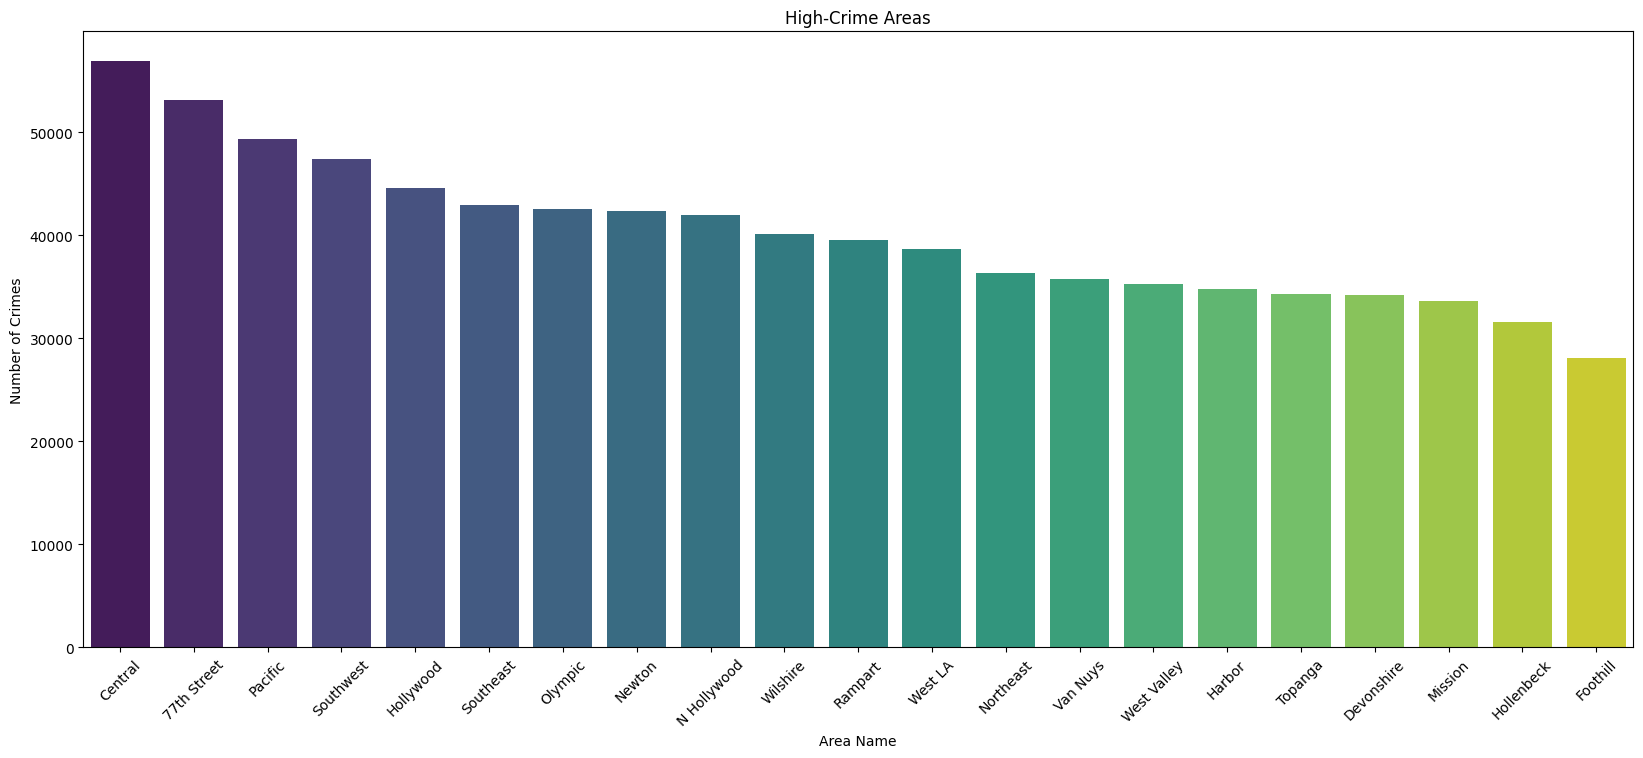

In [14]:
# Plot high-crime areas
plt.figure(figsize=(20, 8))
sns.countplot(x='AREA NAME', data=df, order=df['AREA NAME'].value_counts().index, palette='viridis')
plt.title('High-Crime Areas')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

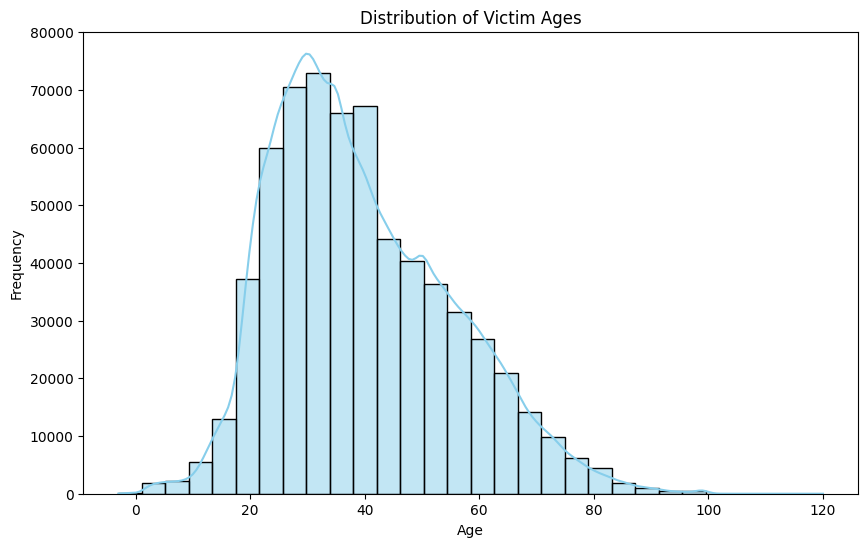

In [15]:
# Plot the distribution of victim ages

# Drop rows where victim age is NA
df.drop(df[df['Vict Age'] == 0].index, inplace = True)

plt.figure(figsize=(10, 6))
sns.histplot(df['Vict Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

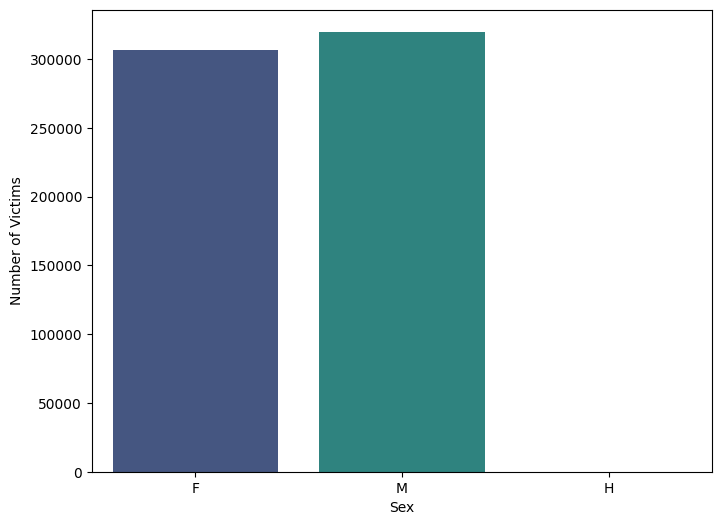

In [16]:
# Plot the distribution of Victim Sex


# Drop rows where victim sex is NA
df.drop(df[df['Vict Sex'] == 'X'].index, inplace = True)

plt.figure(figsize=(8, 6))
sns.countplot(x='Vict Sex', data=df, palette='viridis')
plt.xlabel('Sex')
plt.ylabel('Number of Victims')
plt.show()